<class 'pandas.core.frame.DataFrame'>
Index: 19737 entries, 0 to 23367
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               19737 non-null  int64  
 1   rooms            19202 non-null  object 
 2   apt_type         19737 non-null  object 
 3   metro            19391 non-null  object 
 4   address          19737 non-null  object 
 5   apartment_sqm    19737 non-null  object 
 6   floors_and_type  19737 non-null  object 
 7   parking          8563 non-null   object 
 8   price            19737 non-null  object 
 9   tel              19737 non-null  object 
 10  description      19737 non-null  object 
 11  style            17274 non-null  object 
 12  rooms_sqm        12509 non-null  object 
 13  balcony          13107 non-null  object 
 14  window_view      14587 non-null  object 
 15  bathroom_count   17696 non-null  object 
 16  kids_pets        14822 non-null  object 
 17  utilities        

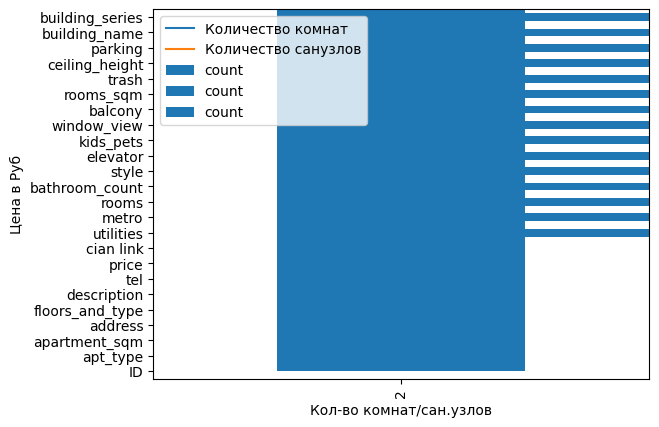

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from notebooks.districts_hoods import *
import import_ipynb
from EDA import df2

In [2]:
#Пишем функции, для получения величин:
# 1. Всего этажей в доме
# 2. Этаж квартиры
# 3. Является ли этаж первым, последним или ни тем ни другим

In [3]:

def get_total_floors(x):
    if isinstance(x, str):
        return int(x.split('/')[1].split(',')[0])
    return x

def get_floor(x):
    if isinstance(x, str):
        return int(x.split('/')[0])
    return x

def first_or_last(x):
    if isinstance(x, str):
        if int(x.split('/')[0]) == 1:
            return "Первый"
        else:
            if int(x.split('/')[0]) / int(x.split('/')[1].split(',')[0]) == 1:
                return "Последний"
            else:
                return "Не первый и не последний"
    
    return x

df2['floor'] = df2['floors_and_type'].map(get_floor)
df2['total_floors'] = df2['floors_and_type'].map(get_total_floors)
df2['first_or_last'] = df2['floors_and_type'].map(first_or_last)

In [4]:
#Пишем функции, для получения величин:
# 1. Доступность от метро в минутах пешком (для данных с минутам на авто был установлен коэффициент х4)
# 2. Есть ли в квартире Кондиционер
# 3. Считаем общее количество Балконов и Лоджий в квартире
# 4. Добавляем колонки Округ и Район согласно адресу
# 5, Проверяем хороший ли ремонт в квартире или косметический


In [5]:
def get_mins_from_metro(x):
    try:
        mins = x.split('(')[1].split(' ')[0]
        if "машине" in x:
            return int(mins) * 4
        else:
            return int(mins)
    except:
        return np.nan

def fix_metro(x):
    if isinstance(x, str):
        return x.split(' (')[0].replace("м. ","")
    return x





df2['mins_from_metro'] = df2['metro'].map(get_mins_from_metro)
df2['metro'] = df2['metro'].map(fix_metro)



In [6]:
def air_con(x):
    if isinstance(x, str):
        if 'Кондиц' in x:
            return 1
        else:
            return 0
    return np.nan    

df2['ac'] = df2['utilities'].map(air_con)

In [7]:
def balcony_count(x):
    if isinstance(x, str):
        return sum(int(i) for i in re.findall(r'\d+', x))
        
    return np.nan    

df2['balcony_counts'] = df2['balcony'].map(balcony_count)

In [8]:
def district(x):
    if isinstance(x, str):
        if x in VAO:
            return "VAO"
        elif x in ZAO:
            return "ZAO"
        elif x in NAO:
            return "NAO"
        elif x in SAO:
            return "SAO"
        elif x in SVAO:
            return "SVAO"
        elif x in SZAO:
            return "SZAO"
        elif x in CAO:
            return "CAO"
        elif x in UVAO:
            return "UVAO"
        elif x in UZAO:
            return "UZAO"
        elif x in UAO:
            return "UAO"
        elif x in MO:
            return "MO"
        
        
    return np.nan    


df2['district'] = df2['metro'].map(district)

In [9]:
df2['hood'] = [str([key for key, val in my_dict.items() if row in val]) if row == row else None for row in df2['metro']]
df2['hood'] = df2['hood'].str.replace("['","")
df2['hood'] = df2['hood'].str.replace("']","")


In [10]:
def expensive_design(x):
    if isinstance(x, str):
        if x == "Дизайнерский" or x == "Евроремонт":
            return 1
        else:
            return 0
        
    return 0    

df2['expensive_design'] = df2['style'].map(expensive_design)

# Без ремонта = дешевый
# Дизайнерский = дорогой
# Евроремонт= дорогой
# Косметический = дешевый
# Нет ремонта = дешевый


In [11]:
df2['price/sqr'] = df2['price_RUR']/df2["apartment_sqm"]

In [12]:
df2['bathroom/room'] = df2['bathrooms']/df2["rooms"]

In [13]:

df2.head()

,ID,rooms,apt_type,metro,address,apartment_sqm,floors_and_type,parking,price,tel,...,total_floors,first_or_last,mins_from_metro,ac,balcony_counts,district,hood,expensive_design,price/sqr,bathroom/room
0,271271157,4.0,Квартира,Смоленская,"Москва, улица Новый Арбат, 27",200.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79166369231,...,16,Не первый и не последний,9.0,1.0,NaN,CAO,Arbat,1,2500.000000,NaN
1,271634126,4.0,Квартира,Смоленская,"Москва, улица Новый Арбат, 27",198.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79850608590,...,16,Не первый и не последний,8.0,1.0,NaN,CAO,Arbat,1,2525.252525,0.75
2,271173086,4.0,Квартира,Смоленская,"Москва, улица Новый Арбат, 27",200.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...","+79672086536, +79099269384",...,16,Не первый и не последний,7.0,1.0,NaN,CAO,Arbat,1,2500.000000,0.75
3,272197456,4.0,Квартира,Смоленская,"Москва, переулок Плотников, 21С1",170.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...","+79660342340, +79099269384",...,6,Не первый и не последний,3.0,1.0,NaN,CAO,Arbat,1,2352.941176,0.75
4,273614615,2.0,Квартира,Арбатская,"Москва, улица Новый Арбат, 15",58.0,"12/26, Панельный",NaN,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",+79852432860,...,26,Не первый и не последний,7.0,0.0,NaN,CAO,Arbat,1,3879.310345,1.00


In [14]:
df2.columns

Index(['ID', 'rooms', 'apt_type', 'metro', 'address', 'apartment_sqm',
       'floors_and_type', 'parking', 'price', 'tel', 'description', 'style',
       'rooms_sqm', 'balcony', 'window_view', 'bathroom_count', 'kids_pets',
       'utilities', 'building_name', 'building_series', 'ceiling_height',
       'elevator', 'trash', 'cian link', 'price_RUR', 'bathrooms', 'floor',
       'total_floors', 'first_or_last', 'mins_from_metro', 'ac',
       'balcony_counts', 'district', 'hood', 'expensive_design', 'price/sqr',
       'bathroom/room'],
      dtype='object')

In [15]:
#Копируем в новый датасет перед удалением столбцов
df3=df2.copy()

In [16]:
#удаляем ненужные столбцы
df3.drop(columns=["apt_type","floors_and_type","price","tel","description","style","rooms_sqm","balcony","bathroom_count","kids_pets","utilities","building_name",'building_series',"elevator","trash",'cian link'], inplace=True)
df3

,ID,rooms,metro,address,apartment_sqm,parking,window_view,ceiling_height,price_RUR,bathrooms,...,total_floors,first_or_last,mins_from_metro,ac,balcony_counts,district,hood,expensive_design,price/sqr,bathroom/room
0,271271157,4.0,Смоленская,"Москва, улица Новый Арбат, 27",200.0,подземная,NaN,3.00,500000.0,NaN,...,16,Не первый и не последний,9.0,1.0,NaN,CAO,Arbat,1,2500.000000,NaN
1,271634126,4.0,Смоленская,"Москва, улица Новый Арбат, 27",198.0,подземная,На улицу и двор,3.50,500000.0,3.0,...,16,Не первый и не последний,8.0,1.0,NaN,CAO,Arbat,1,2525.252525,0.75
2,271173086,4.0,Смоленская,"Москва, улица Новый Арбат, 27",200.0,подземная,На улицу и двор,3.20,500000.0,3.0,...,16,Не первый и не последний,7.0,1.0,NaN,CAO,Arbat,1,2500.000000,0.75
3,272197456,4.0,Смоленская,"Москва, переулок Плотников, 21С1",170.0,подземная,На улицу и двор,3.20,400000.0,3.0,...,6,Не первый и не последний,3.0,1.0,NaN,CAO,Arbat,1,2352.941176,0.75
4,273614615,2.0,Арбатская,"Москва, улица Новый Арбат, 15",58.0,NaN,На улицу и двор,3.90,225000.0,2.0,...,26,Не первый и не последний,7.0,0.0,NaN,CAO,Arbat,1,3879.310345,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,215565511,NaN,Говорово,"Москва, Боровское шоссе, 2к7, ш. Боровское (3 ...",35.0,NaN,NaN,NaN,42000.0,1.0,...,14,Не первый и не последний,8.0,1.0,1.0,NAO,Moskovsk,1,1200.000000,NaN
23364,274654844,1.0,Солнцево,"Москва, Производственная улица, 8к1, ш. Боровс...",38.7,NaN,Во двор,NaN,45000.0,1.0,...,18,Не первый и не последний,7.0,0.0,1.0,ZAO,Solncevo,1,1162.790698,1.00
23365,268679909,2.0,Солнцево,"Москва, Боровский проезд, 11",43.1,NaN,На улицу и двор,NaN,50000.0,1.0,...,5,Последний,6.0,1.0,1.0,ZAO,Solncevo,1,1160.092807,0.50
23366,274807525,2.0,Солнцево,"Москва, улица Богданова, 6к1, ш. Боровское (3 ...",52.5,наземная,Во двор,2.65,55000.0,2.0,...,23,Не первый и не последний,11.0,1.0,1.0,ZAO,Solncevo,1,1047.619048,1.00


In [17]:
df3["mins_from_metro"].mean()

np.float64(12.219328488834668)

In [18]:

df3["rooms"] = df3["rooms"].fillna(1)
df3["metro"] = df3["metro"].fillna("Нет метро")
df3["parking"] = df3["parking"].fillna("нет парковки")
df3["window_view"] = df3["window_view"].fillna("Не известно")
df3["ceiling_height"] = df3["ceiling_height"].fillna(2.5)
df3["bathrooms"] = df3["bathrooms"].fillna(1)
df3["mins_from_metro"] = df3["mins_from_metro"].fillna(df3["mins_from_metro"].mean())
df3["ac"] = df3["ac"].fillna(0)
df3["balcony_counts"] = df3["balcony_counts"].fillna(0)
df3["district"] = df3["district"].fillna("не известно")
df3["hood"] = df3["hood"].fillna("не известно")
df3["bathroom/room"] = df3["bathroom/room"].fillna(df3['bathrooms']/df3["rooms"])


In [19]:
df3.isna().sum()

ID                  0
rooms               0
metro               0
address             0
apartment_sqm       0
parking             0
window_view         0
ceiling_height      0
price_RUR           0
bathrooms           0
floor               0
total_floors        0
first_or_last       0
mins_from_metro     0
ac                  0
balcony_counts      0
district            0
hood                0
expensive_design    0
price/sqr           0
bathroom/room       0
dtype: int64

In [20]:
df3['rooms'] = df3['rooms'].astype("float64").apply(lambda x: round(x, 0))
df3['apartment_sqm'] = df3['apartment_sqm'].astype("float64").apply(lambda x: round(x, 0))
df3['price_RUR'] = df3['price_RUR'].astype("float64").apply(lambda x: round(x, 0))
df3['bathrooms'] = df3['bathrooms'].astype("float64").apply(lambda x: round(x, 0))
df3['floor'] = df3['floor'].astype("float64").apply(lambda x: round(x, 0))
df3['total_floors'] = df3['total_floors'].astype("float64").apply(lambda x: round(x, 0))
df3['mins_from_metro'] = df3['mins_from_metro'].astype("float64").apply(lambda x: round(x, 0))
df3['ac'] = df3['ac'].astype("float64").apply(lambda x: round(x, 0))
df3['balcony_counts'] = df3['balcony_counts'].astype("float64").apply(lambda x: round(x, 0))
df3['expensive_design'] = df3['expensive_design'].astype("float64").apply(lambda x: round(x, 0))
df3['price/sqr'] = df3['price/sqr'].astype("float64").apply(lambda x: round(x, 2))
df3['bathroom/room'] = df3['bathroom/room'].astype("float64").apply(lambda x: round(x, 2))

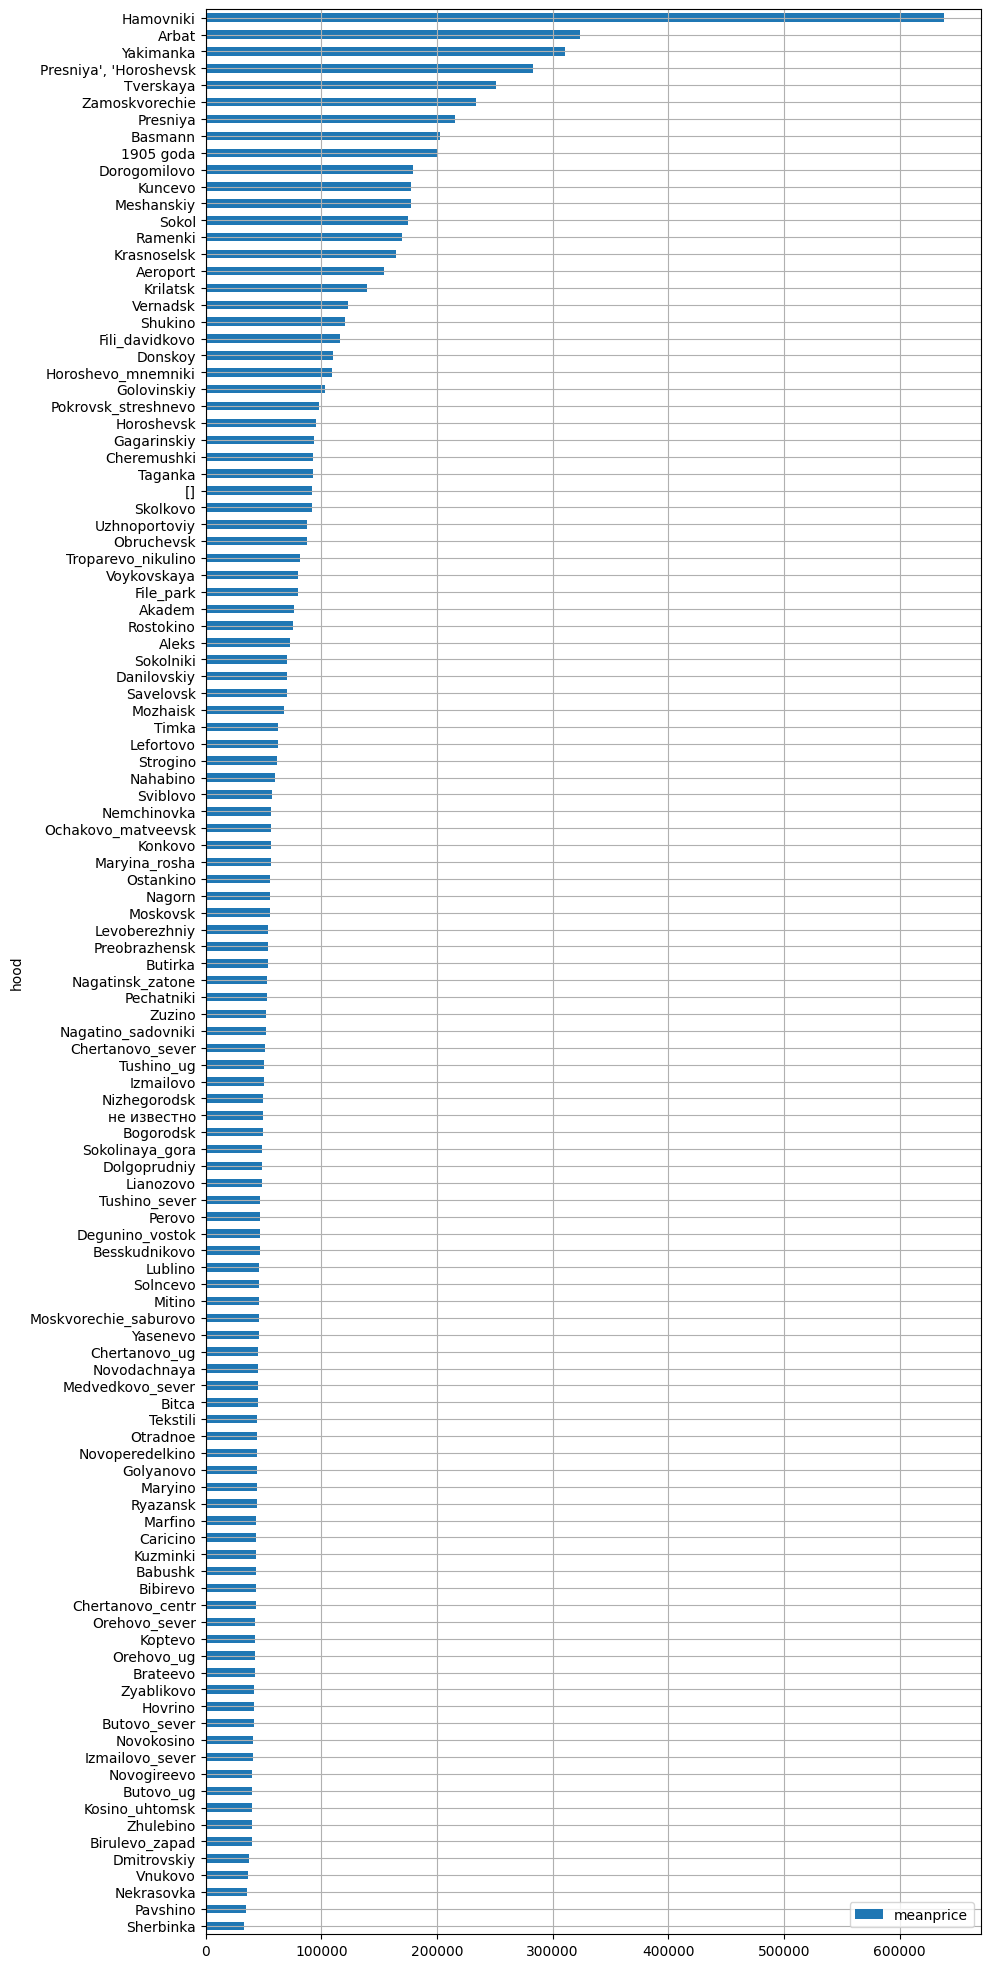

In [21]:
df3.groupby("hood").agg(meanprice = ("price_RUR","mean")).sort_values(by ="meanprice").plot.barh(figsize=(10,25))
plt.grid()

In [22]:
df3

,ID,rooms,metro,address,apartment_sqm,parking,window_view,ceiling_height,price_RUR,bathrooms,...,total_floors,first_or_last,mins_from_metro,ac,balcony_counts,district,hood,expensive_design,price/sqr,bathroom/room
0,271271157,4.0,Смоленская,"Москва, улица Новый Арбат, 27",200.0,подземная,Не известно,3.00,500000.0,1.0,...,16.0,Не первый и не последний,9.0,1.0,0.0,CAO,Arbat,1.0,2500.00,0.25
1,271634126,4.0,Смоленская,"Москва, улица Новый Арбат, 27",198.0,подземная,На улицу и двор,3.50,500000.0,3.0,...,16.0,Не первый и не последний,8.0,1.0,0.0,CAO,Arbat,1.0,2525.25,0.75
2,271173086,4.0,Смоленская,"Москва, улица Новый Арбат, 27",200.0,подземная,На улицу и двор,3.20,500000.0,3.0,...,16.0,Не первый и не последний,7.0,1.0,0.0,CAO,Arbat,1.0,2500.00,0.75
3,272197456,4.0,Смоленская,"Москва, переулок Плотников, 21С1",170.0,подземная,На улицу и двор,3.20,400000.0,3.0,...,6.0,Не первый и не последний,3.0,1.0,0.0,CAO,Arbat,1.0,2352.94,0.75
4,273614615,2.0,Арбатская,"Москва, улица Новый Арбат, 15",58.0,нет парковки,На улицу и двор,3.90,225000.0,2.0,...,26.0,Не первый и не последний,7.0,0.0,0.0,CAO,Arbat,1.0,3879.31,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,215565511,1.0,Говорово,"Москва, Боровское шоссе, 2к7, ш. Боровское (3 ...",35.0,нет парковки,Не известно,2.50,42000.0,1.0,...,14.0,Не первый и не последний,8.0,1.0,1.0,NAO,Moskovsk,1.0,1200.00,1.00
23364,274654844,1.0,Солнцево,"Москва, Производственная улица, 8к1, ш. Боровс...",39.0,нет парковки,Во двор,2.50,45000.0,1.0,...,18.0,Не первый и не последний,7.0,0.0,1.0,ZAO,Solncevo,1.0,1162.79,1.00
23365,268679909,2.0,Солнцево,"Москва, Боровский проезд, 11",43.0,нет парковки,На улицу и двор,2.50,50000.0,1.0,...,5.0,Последний,6.0,1.0,1.0,ZAO,Solncevo,1.0,1160.09,0.50
23366,274807525,2.0,Солнцево,"Москва, улица Богданова, 6к1, ш. Боровское (3 ...",52.0,наземная,Во двор,2.65,55000.0,2.0,...,23.0,Не первый и не последний,11.0,1.0,1.0,ZAO,Solncevo,1.0,1047.62,1.00


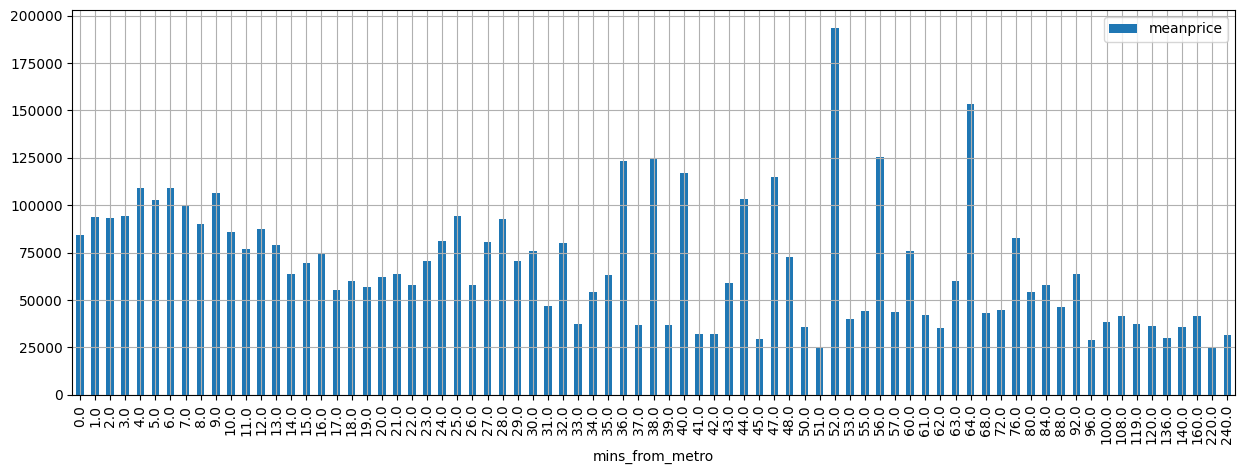

In [23]:
df3.groupby("mins_from_metro").agg(meanprice = ("price_RUR","mean")).plot(kind = "bar", figsize=(15,5))
plt.grid()

In [24]:
def close_to_metro(x):
    if x <= 10:
        return 1
    else:
        return 0
    
df3['close_to_metro'] = df3['mins_from_metro'].map(close_to_metro)    

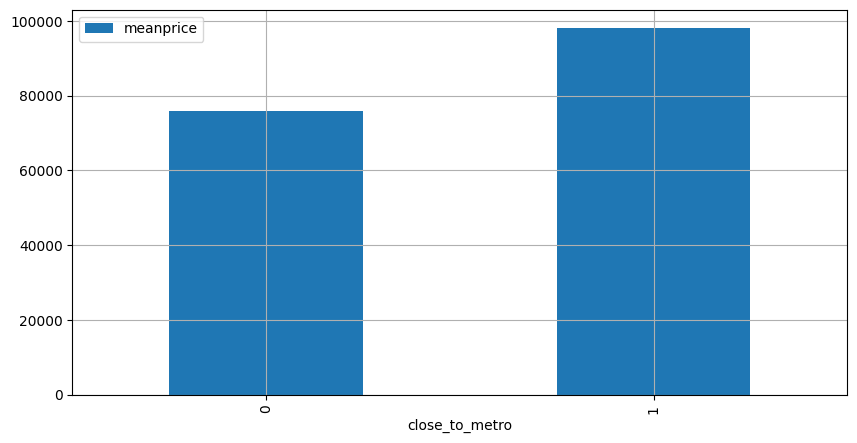

In [25]:
df3.groupby("close_to_metro").agg(meanprice = ("price_RUR","mean")).plot(kind = "bar", figsize=(10,5))
plt.grid()

In [26]:
df3.columns

Index(['ID', 'rooms', 'metro', 'address', 'apartment_sqm', 'parking',
       'window_view', 'ceiling_height', 'price_RUR', 'bathrooms', 'floor',
       'total_floors', 'first_or_last', 'mins_from_metro', 'ac',
       'balcony_counts', 'district', 'hood', 'expensive_design', 'price/sqr',
       'bathroom/room', 'close_to_metro'],
      dtype='object')

In [27]:
df3.head(2)

,ID,rooms,metro,address,apartment_sqm,parking,window_view,ceiling_height,price_RUR,bathrooms,...,first_or_last,mins_from_metro,ac,balcony_counts,district,hood,expensive_design,price/sqr,bathroom/room,close_to_metro
0,271271157,4.0,Смоленская,"Москва, улица Новый Арбат, 27",200.0,подземная,Не известно,3.0,500000.0,1.0,...,Не первый и не последний,9.0,1.0,0.0,CAO,Arbat,1.0,2500.00,0.25,1
1,271634126,4.0,Смоленская,"Москва, улица Новый Арбат, 27",198.0,подземная,На улицу и двор,3.5,500000.0,3.0,...,Не первый и не последний,8.0,1.0,0.0,CAO,Arbat,1.0,2525.25,0.75,1


In [28]:
# Огромнейшая благодарность самой дружелюбной команде потока "Боевые Суслики" за помощь в кодировке столбцов
# А так же за написание модели и подсчет парамметра MAPE
# Ринат - легенда, Ирина - легенда, Савелий -легенда

In [29]:
df3.drop(columns=["mins_from_metro"], inplace=True)
df3["target"] = df3["price_RUR"]
df3['close_to_metro'] = df3['close_to_metro'].astype("float64").apply(lambda x: round(x, 0))
df3.drop(columns=["price_RUR"], inplace=True)



In [30]:
df3.dtypes

ID                    int64
rooms               float64
metro                object
address              object
apartment_sqm       float64
parking              object
window_view          object
ceiling_height      float64
bathrooms           float64
floor               float64
total_floors        float64
first_or_last        object
ac                  float64
balcony_counts      float64
district             object
hood                 object
expensive_design    float64
price/sqr           float64
bathroom/room       float64
close_to_metro      float64
target              float64
dtype: object

In [31]:
# с данной колонкой показатель MAPE был 1.53%, решили убрать для справедливости
df3.drop(columns=["price/sqr"], inplace=True)

In [32]:
# Повторная загрузка библиотек после сброса состояния
from sklearn.preprocessing import LabelEncoder

# 🔹 2. Находим категориальные колонки (строковые данные)
categorical_columns = df3.select_dtypes(include=["object"]).columns

# 🔹 3. Приводим все категориальные признаки к строковому типу (чтобы избежать смешанных типов)
df3[categorical_columns] = df3[categorical_columns].astype(str)

# 🔹 4. Кодируем категориальные признаки с помощью LabelEncoder
label_encoders = {}  # Словарь для сохранения энкодеров

for col in categorical_columns:
    le = LabelEncoder()
    df3[col] = le.fit_transform(df3[col])  # Кодируем столбец
    label_encoders[col] = le  # Сохраняем encoder для возможного обратного преобразования

df3

,ID,rooms,metro,address,apartment_sqm,parking,window_view,ceiling_height,bathrooms,floor,total_floors,first_or_last,ac,balcony_counts,district,hood,expensive_design,bathroom/room,close_to_metro,target
0,271271157,4.0,208,9598,200.0,5,3,3.00,1.0,5.0,16.0,0,1.0,0.0,0,4,1.0,0.25,1.0,500000.0
1,271634126,4.0,208,9598,198.0,5,2,3.50,3.0,5.0,16.0,0,1.0,0.0,0,4,1.0,0.75,1.0,500000.0
2,271173086,4.0,208,9598,200.0,5,2,3.20,3.0,5.0,16.0,0,1.0,0.0,0,4,1.0,0.75,1.0,500000.0
3,272197456,4.0,208,7234,170.0,5,2,3.20,3.0,5.0,6.0,0,1.0,0.0,0,4,1.0,0.75,1.0,400000.0
4,273614615,2.0,10,9595,58.0,3,2,3.90,2.0,12.0,26.0,0,0.0,0.0,0,4,1.0,1.00,1.0,225000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,215565511,1.0,53,1374,35.0,3,3,2.50,1.0,10.0,14.0,0,1.0,1.0,2,55,1.0,1.00,1.0,42000.0
23364,274654844,1.0,212,5114,39.0,3,0,2.50,1.0,5.0,18.0,0,0.0,1.0,10,92,1.0,1.00,1.0,45000.0
23365,268679909,2.0,212,1351,43.0,3,2,2.50,1.0,5.0,5.0,2,1.0,1.0,10,92,1.0,0.50,1.0,50000.0
23366,274807525,2.0,212,8055,52.0,2,0,2.65,2.0,8.0,23.0,0,1.0,1.0,10,92,1.0,1.00,0.0,55000.0


In [33]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler

# ✅ Подготовка данных (используем уже предобработанный df)

# 🔹 Разделяем признаки (X) и целевую переменную (y)
X = df3.drop(columns=['target'])  # Убираем целевую переменную из признаков
y = df3['target']

# 🔹 Разделяем данные на тренировочную и тестовую выборки (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Нормализация данных (масштабирование)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 📌 Создание и обучение модели XGBoost
model = xgb.XGBRegressor(
    objective='reg:squarederror',  # Оптимизация MSE
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

# 🔹 Обучаем модель
model.fit(X_train_scaled, y_train)

# ✅ Делаем предсказания
y_pred = model.predict(X_test_scaled)

# 🔹 Вычисляем MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)

# 📌 Вывод результата
print(f"📊 MAPE модели XGBoost: {mape:.2%}")

📊 MAPE модели XGBoost: 16.83%


In [34]:
#Да, мы тоже не ожидали...

In [35]:
df3.to_csv("pozorniki.csv", index=False, encoding="utf-8")